In [22]:
import os
import pandas as pd
import sys

In [23]:
path= (r'C:\Users\Rahul\Desktop\data visualisation\REAL SALES DATA\Sales_Data')
files= [file for file in os.listdir(path)]
allmonth_data= pd.DataFrame()

for file in files:
    current_data= pd.read_csv(path+"/"+file)
    allmonth_data=pd.concat([allmonth_data,current_data])
    
allmonth_data.to_csv(r'C:\Users\Rahul\Desktop\data visualisation\REAL SALES DATA\Sales_Data\full_data.csv',index =False)
    

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [24]:
allmonth_data.columns = map(str.lower,allmonth_data.columns)
na_data= allmonth_data[allmonth_data.isna().any(axis=1)]
allmonth_data=allmonth_data.dropna(how='all')
allmonth_data=allmonth_data[allmonth_data 
allmonth_data['months']=allmonth_data['order date'].str[0:2]
#allmonth_data['months']=allmonth_data['months'].astype('int32')
allmonth_data.head()

,order date,order id,price each,product,purchase address,quantity ordered,unnamed: 0,months
0,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,0.0,04
1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,2.0,04
3,04/12/19 14:38,176560,600,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,3.0,04
4,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,4.0,04


#### add city columns

In [27]:
allmonth_data['city']= allmonth_data['purchase address'].apply(lambda x:x.split(',')[1])
allmonth_data.head()

AttributeError: 'float' object has no attribute 'split'

In [ ]:
allmonth_data.groupby('months')['price each'].sum()

In [4]:
allmonth_data['price each']=pd.to_numeric(allmonth_data['price each'])
allmonth_data['quantity ordered']=pd.to_numeric(allmonth_data['quantity ordered'])

In [5]:
allmonth_data['sales']=allmonth_data['price each']*allmonth_data['quantity ordered']
allmonth_data.head()


,order date,order id,price each,product,purchase address,quantity ordered,unnamed: 0,months,sales
0,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2.0,0.0,04,23.90
1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1.0,2.0,04,99.99
3,04/12/19 14:38,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1.0,3.0,04,600.00
4,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1.0,4.0,04,11.99


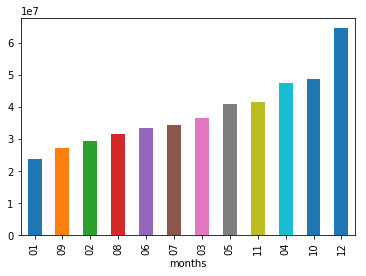

In [8]:
sales_sum= allmonth_data.groupby('months')['sales'].sum().sort_values()
sales_sum.plot(kind='bar')

In [16]:
order_sum= allmonth_data.groupby('months')['quantity ordered'].sum()
order_sum.tail(1)

months
12    393562.0
Name: quantity ordered, dtype: float64

In [17]:
import matplotlib.pyplot as plt

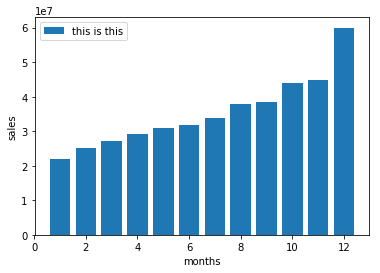

In [72]:
#= range(1,13)
plt.bar(months,sales_sum)
plt.xlabel('months')
plt.ylabel('sales')
plt.legend(['this is this','this is that'])
plt.show()